## <a name="content">Содержание</a>
- [0. Знакомство с проектом](#0)
 - [0.1. Описание данных](#0.1)
 - [0.2. Подключение библиотек](#0.2)
- [1. Изучение общей информации о датафрейме](#1)
- [2. Аналитика данных. Топ-10 городов по количеству рейсов](#2)
 - [2.1. Модели самолётов и количество рейсов](#2.1)
 - [2.2. Города и количество рейсов](#2.2)
- [3. Вывод ](#3)

<hr>

### 0. Знакомство с проектом  <a name="0"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>


**Компании «F9»** — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

<a name="0.1"></a>
#### 0.1. Описание данных
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>


База данных об авиаперевозках:    
Таблица `airports` — информация об аэропортах:
- *airport_code* — трёхбуквенный код аэропорта
- *airport_name* — название аэропорта
- *city* — город
- *timezone* — временная зона    

Таблица `aircrafts` — информация об самолётах:
- *aircraft_code* — код модели самолёта
- *model* — модель самолёта
- *range* — количество самолётов    

Таблица `tickets` — информация о билетах:
- *ticket_no* — уникальный номер билета
- *passenger_id* — персональный идентификатор пассажира
- *passenger_name* — имя и фамилия пассажира    

Таблица `flights` — информация о рейсах:
- *flight_id* — уникальный идентификатор рейса
- *departure_airport* — аэропорт вылета
- *departure_time* — дата и время вылета
- *arrival_airport* — аэропорт прилёта
- *arrival_time* — дата и время прилёта
- *aircraft_code* – id самолёта    

Таблица `ticket_flights` — стыковая таблица «рейсы-билеты»
- *ticket_no* — номер билета
- *flight_id* — идентификатор рейса     

Таблица `festivals` — информация о фестивалях
- *festival_id* — уникальный номер фестиваля
- *festival_date* — дата проведения фестиваля
- *festival_city* — город проведения фестиваля
- *festival_name* — название фестиваля

<a name="0.3"></a>
#### 0.2. Подключение библиотек
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

<hr>

<a name="1"></a>
### 1. Изучение общей информации о датафрейме
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Загружаем данные:

In [3]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

Ознакомимся с таблицами:

In [4]:
display(model_flights)
display(city_flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропуски в данных отсуствуют.    
В таблице `model_flights` колонка *model* имеет строковый тип данных (**object**), колонка *flight_amount* целочисленного типпа (**int64**).     
Таблица `city_flights` имеет два столбца: *city* - строковый тип данных (**object**), *average_flights* - с плавающей запятой (**float64**).     
То, что нам нужно, оставляем без изменений.  

<hr>

<a name="2"></a>
### 2. Аналитика данных. Топ-10 городов по количеству рейсов
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Выведем топ-10 городов по количеству рейсов:

In [7]:
top_10_city = city_flights.sort_values('average_flights', ascending=False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Для наглядности построим график:

In [30]:
import plotly.express as px


data_canada = top_10_city
fig = px.bar(data_canada, x='city', y='average_flights',
             color='city',
             height=400)
fig.show()

In [48]:
# создаем график
trace2 = go.Bar(
    x=top_10_city['city'],
    y=top_10_city['average_flights'],
    marker_color=['maroon', 'mediumaquamarine',
            'mediumblue', 'mediumorchid', 'mediumpurple',
            'mediumseagreen', 'mediumslateblue', 'mediumspringgreen',
            'mediumturquoise', 'mediumvioletred', 'midnightblue']
)

# соединяем данные и стили
layout = {'title': 'Топ-10 городов со средним количеством рейсов за август 2018 года'}



# создаем фигуру и рисуем график
fig = go.Figure(data = trace2, layout = layout)
iplot(fig, show_link = False)

plt.show()

Выделяется 3 лидера по количеству рейсов: **Москва**, **Санкт-Петербург** и **Новосибирск**.

<a name="2.1"></a>
#### 2.1. Модели самолётов и количество рейсов
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a> 

Построим график:

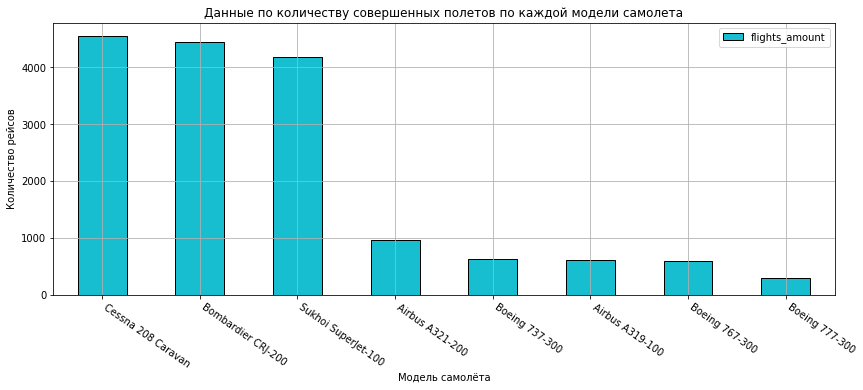

In [9]:
ax = (
    model_flights
    .sort_values('flights_amount', ascending=False)
    .plot(x='model', kind = 'bar', ec='black', figsize = (14, 5), grid = True, color='#17becf')
)
ax.set(title = 'Данные по количеству совершенных полетов по каждой модели самолета', ylabel = 'Количество рейсов', xlabel = 'Модель самолёта')
plt.xticks(rotation=-35, ha='left')
plt.show()

3 модели самолётов являются лидерами по количеству рейсов в России на период август 2018 года:

1. **Cessna 208 Caravan** - 4557 перелетов (самолёт на 13 мест)
2. **Bombardier CRJ-200** - 4446 перелетов (самолёт на 50 мест)
3. **Sukhoi SuperJet-100** - 4185 перелетов (самолёт на 98 мест)

<a name="2.2"></a>
#### 2.2. Города и количество рейсов
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Построим график:

In [70]:
temp = city_flights.sort_values('average_flights')
fig = px.bar(temp, x='average_flights', y='city',
             orientation='h',
             title='Данные по среднему количеству перелётов для городов России за август 2018 года',
             labels={'average_flights': 'Среднее количество полётов',
                     'city': 'Город'}
            )
fig.update_yaxes(range=[-0.5, len(temp['city'])])
fig.show()

Москва является лидером по совершенным рейсам.

<hr>

<a name="3"></a>
### 3. Вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Мы сделали следующее:

Нами были изучины данные по количеству перелетов за август 2018 года по каждой модели самолета. *Выяснилось, что самыми используемыми моделями самолета (август 2018 года) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.*     
Нами были определены города с самым высоким средним трафиком полётов:
1. Москва
2. Санкт-Петербург
3. Новосибирск.